In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


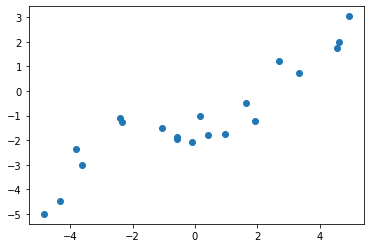

In [3]:
# generate 20 data points
N = 20

# rnadom data on the x-axis in (-5,5)
X = np.random.random(N)*10 - 5

# a line plus some noise
# we add gaussian noise with mean 1 and variance 0 because
# MSE is roughly the same as the variance of a normally distributed 
# variable, so MSE should increase roughly by the variance of the noise
# you're adding. If the noise has 0 variance, MSE shouldn't increase
# too much even if we add some noise to the data. 
# you can see this demonstration in 
Y = .5 * X - 1 + np.random.randn(N)

# plot synthetic data
plt.scatter(X, Y);

In [12]:
# Create the linear regression model
model = nn.Linear(1,1) # we have 1 input and 1 output

In [13]:
# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [6]:
# In ML we want our data to be of shape (num_samples x num_dimensions)
# So reshape the data
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

In [8]:
# PyTorch uses float32 tensors by default
# Numpy creates float64 matrices by default
# so if we want to work on PyTorch, we should change the datatype
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [9]:
print(type(inputs),type(targets))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [14]:
# Training part
n_epochs = 30
losses = [] # keep the losses to plot them later

for _ in range(n_epochs):
  # set parameter gradients zero
  # Well this is kinda seems meanless but when you're doing
  # back-propagation the automatic differentiation library that
  # pytorch use (autograd) is just remembers how to compute 
  # the gradient for a given variable. Also it accumulates 
  # the calculated gradients over time so if you don't clear
  # the calculated gradients, the gradient that calculated in previous
  # step would interfere the gradient that autograd calculating in 
  # this step. So we're resetting the gradients on every step
  # to prevent this "accumulation" of gradients
  # source: https://discuss.pytorch.org/t/why-do-we-need-to-set-the-gradients-manually-to-zero-in-pytorch/4903
  optimizer.zero_grad()

  # Forward propagation
  outputs = model(inputs) # calculate prediction | returns pytorch tensor
  loss = criterion(outputs,targets) # calculate the loss | returns pytorch tensor

  # keep the loss so we can plot it later
  losses.append(loss.item())

  # Backward propagation
  loss.backward() # calculate gradients
  optimizer.step() # optimize the step for doing gradient descent
  
  print(f"Epoch {_+1}/{n_epochs}, Loss: {loss.item():.4f}")


Epoch 1/30, Loss: 1.8219
Epoch 2/30, Loss: 1.3848
Epoch 3/30, Loss: 1.1184
Epoch 4/30, Loss: 0.9555
Epoch 5/30, Loss: 0.8555
Epoch 6/30, Loss: 0.7939
Epoch 7/30, Loss: 0.7558
Epoch 8/30, Loss: 0.7322
Epoch 9/30, Loss: 0.7176
Epoch 10/30, Loss: 0.7084
Epoch 11/30, Loss: 0.7027
Epoch 12/30, Loss: 0.6992
Epoch 13/30, Loss: 0.6969
Epoch 14/30, Loss: 0.6955
Epoch 15/30, Loss: 0.6946
Epoch 16/30, Loss: 0.6941
Epoch 17/30, Loss: 0.6937
Epoch 18/30, Loss: 0.6935
Epoch 19/30, Loss: 0.6933
Epoch 20/30, Loss: 0.6932
Epoch 21/30, Loss: 0.6932
Epoch 22/30, Loss: 0.6932
Epoch 23/30, Loss: 0.6931
Epoch 24/30, Loss: 0.6931
Epoch 25/30, Loss: 0.6931
Epoch 26/30, Loss: 0.6931
Epoch 27/30, Loss: 0.6931
Epoch 28/30, Loss: 0.6931
Epoch 29/30, Loss: 0.6931
Epoch 30/30, Loss: 0.6931


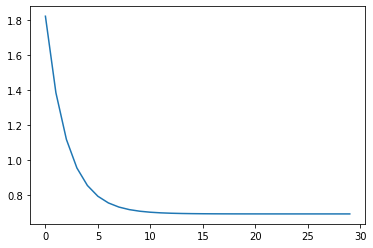

In [16]:
# plot the loss
plt.plot(losses);

[]

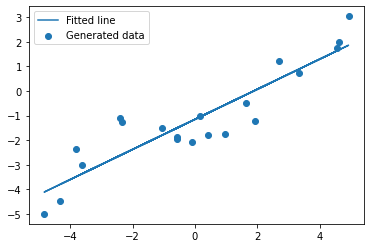

In [22]:
# plot the graph with found line
# when you initialize a tensor in pytorch, torch.Tensor class start tracking every operation on the initialized tensor
# so if you want to convert the tensor to the numpy array, you should first detach the tensor from this tracking, then you can convert it to numpy array

# TLDR; you can't call numpy() on variable that requires gradient calculation
# because torch.Tensor class tracks the operations on that variable

predicted = model(inputs).detach().numpy() 
plt.scatter(X,Y, label = 'Generated data')
plt.plot(X, predicted, label = 'Fitted line')
plt.legend()
plt.plot()

In [24]:
# but we can also calculate predictions by simply not calculating gradients,
# this will stop the tracking of operations so we now can call numpy()
# to convert tensor to the numpy array

with torch.no_grad():
  out = model(inputs).numpy()
out

array([[ 1.6458799 ],
       [-0.88608515],
       [-4.108967  ],
       [-0.57055116],
       [-2.5732446 ],
       [ 0.49692738],
       [-3.795415  ],
       [ 0.0207268 ],
       [-1.2161112 ],
       [ 0.8828567 ],
       [ 1.8627638 ],
       [-0.15648949],
       [-1.4953457 ],
       [-1.7953506 ],
       [ 1.6728386 ],
       [-1.0505748 ],
       [-3.3614287 ],
       [-2.6249132 ],
       [-3.4930377 ],
       [-1.5023557 ]], dtype=float32)

In [25]:
# In order to test the efficacy of the model,
# synthetic data is useful because we already know the answers
# True values for (w,b) are (.5, -1)
# so let's check if the gradient descent found something close to these
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)
# we can say that the algorithm almost found the correct values

[[0.61137915]] [-1.1517528]
